In [2]:
import json
import codecs
import sys
import os
import numpy as np
import pandas as pd
from functools import partialmethod
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from fastai import *
from fastai.vision import *
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
from imutils import build_montages
from imutils import paths
import argparse
import imutils

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [17]:
%cd /content/drive/My Drive/Research_Project_3/Photos

/content/drive/My Drive/Research_Project_3/Photos


In [ ]:
files = []
for i in path:
    if "instagram" in i:
        file = pd.read_json(i, lines=True)
        files.append(file)
    
df_all = pd.concat(files, axis=0)

In [0]:
#df = pd.read_json("balenciaga_instagram_201910.jsonl", lines=True)
df = pd.read_csv('balenciaga_instagram_201910.csv')
df.head()

,id,content,content_type,link,social/likes,social/replies,origin/0,publication_date,thumbnail_url,country,source/id,source/name,source/url,source/title,source/metrics/audience,source/voice/id,source/voice/lab_id,source/voice/name,source/voice/type,source/voice/detailed_type,source/voice/country,source/channel/id,source/channel/type,metrics/kepler/miv_raw,metrics/kepler/miv,metrics/kepler/factor_engagement_rate,metrics/kepler/miv_version,metrics/kepler/miv_full_version,metrics/kepler/weighted_miv,metrics/v2_1/miv_raw,metrics/v2_1/miv,metrics/v2_1/factor_engagement_rate,metrics/v2_1/miv_version,metrics/v2_1/miv_full_version,metrics/v2/miv_raw,metrics/v2/miv,metrics/v2/factor_engagement_rate,metrics/v2/miv_version,metrics/v2/miv_full_version,photos/0,nap/id,nap/channel_type_id,brand/id,brand/name,brand/voice_type,metrics/kepler/factor_brand_voice,metrics/v2_1/factor_brand_voice,metrics/kepler/factor_giveaway,metrics/v2_1/factor_giveaway,entities/celebrities/0,entities/creator/0,entities/creator/1,entities/creator/2,entities/creator/3,entities/creator/4,entities/all star influencers/0,entities/celebrities old/0,entities/celebrities/1,entities/celebrities old/1,entities/all star influencers/1,entities/all star influencers/2,entities/creator/5,entities/events/0
0,insta:18083544205105652,Fresh off her virtual appearance at louisvuitt...,text+photo,https://www.instagram.com/p/B3H8lQOnbPI/,8174,106,nap,2019-10-02T17:26:59Z,https://scontent.xx.fbcdn.net/v/t51.2885-15/71...,US,insta:17841401324380353,vmagazine,https://instagram.com/vmagazine,V Magazine,1758325,150785899668705560,ent:150785899668705560,V Magazine - US,media,media,US,instagram,SOCIAL,23077.436822,17308.077617,0.75,kepler (v2_1),kopernik.valuation.v2_1.evaluator,17308.077617,23077.436822,17308.077617,0.75,v2_1,kopernik.valuation.v2_1.evaluator,23077.436822,17308.077617,0.75,v2,kopernik.valuation.v2.evaluator,https://scontent.xx.fbcdn.net/v/t51.2885-15/71...,15700410310518962463,51.0,balenciaga,balenciaga,media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,insta:17905891573366640,HYPE yesjulz x brianchristopher__ | #styledbye...,text+photo,https://www.instagram.com/p/B3IGjN8Bbqd/,224,2,nap,2019-10-02T18:54:05Z,https://scontent.xx.fbcdn.net/v/t51.2885-15/69...,US,insta:17841401165770347,eburnsprepjerks,https://instagram.com/eburnsprepjerks,Eburns,43891,139758257342604471,inf:139758257342604471,Eric Burns,influencer,influencer,US,instagram,SOCIAL,668.358947,501.269210,0.75,kepler (v2_1),kopernik.valuation.v2_1.evaluator,501.269210,668.358947,501.269210,0.75,v2_1,kopernik.valuation.v2_1.evaluator,668.358947,501.269210,0.75,v2,kopernik.valuation.v2.evaluator,https://scontent.xx.fbcdn.net/v/t51.2885-15/69...,15700598730511192384,51.0,balenciaga,balenciaga,influencer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,insta:17964627157288875,What do you recognize in this picture? ...i se...,text+photo,https://www.instagram.com/p/B3IH43bIL1Y/,130,1,nap,2019-10-02T19:05:47Z,https://scontent.xx.fbcdn.net/v/t51.2885-15/71...,DE,insta:17841401507594181,annaaborisovna,https://instagram.com/annaaborisovna,Anna Borisovna,56425,155912226292232268,inf:155912226292232268,Anna Borisovna,influencer,influencer,DE,instagram,SOCIAL,665.603921,499.202941,0.75,kepler (v2_1),kopernik.valuation.v2_1.evaluator,499.202941,665.603921,499.202941,0.75,v2_1,kopernik.valuation.v2_1.evaluator,665.603921,499.202941,0.75,v2,kopernik.valuation.v2.evaluator,https://scontent.xx.fbcdn.net/v/t51.2885-15/71...,15700629810517391113,51.0,balenciaga,balenciaga,influencer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,insta:17843678350704458,0310.\r\nОчки Balenciaga\r\nНовые\r\nПолный ко...,text+photo,https://www.instagram.com/p/B3IXHzHBLqn/,3,0,nap,2019-10-02T21:18:53Z,https://scontent.xx.fbcdn.net/v/t51.2885-15/71...,NaN,insta:17841401206862367,komuccuonka,https://instagram.com/komuccuonka,КОМИССИОННЫЙ ЛЮКС БРЕНДЫ,47294,155912098210062486,ent

In [0]:
set(df['brand/voice_type'])

{'celebrity', 'influencer', 'media', 'owned', 'partner'}

# get vector of combination of color 

Shape: (1350, 1080, 3)


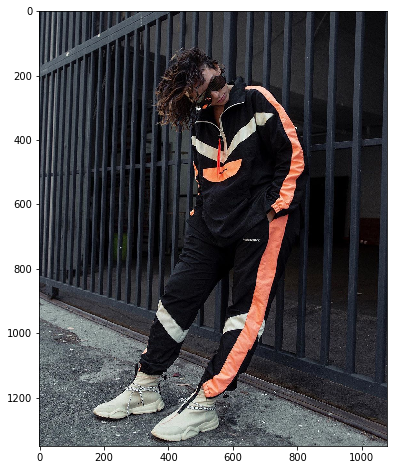

In [0]:
image = cv2.imread('69579144_105404090780798_2353175456807184762_n.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print("Shape: {}".format(image.shape))
plt.figure(figsize=(10, 8))
plt.imshow(image)

In [0]:
image.shape

(1350, 1080, 3)

In [0]:
def rgb2hex(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [0]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [0]:
# reduce the pixels to reduce computational time
modified_image = cv2.resize(image, (270, 216), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0] * modified_image.shape[1], 3)

In [0]:
km = KMeans(n_clusters = 8)
labels = km.fit_predict(modified_image)

([<matplotlib.patches.Wedge at 0x18fbb0550>,
 [Text(0.9375634464546468, 0.5753040794850013, '#c8c6ba'),
  Text(0.15848690904512355, 1.088522806220119, '#e3856a'),
  Text(-0.6282130567398384, 0.9029664198305432, '#43464d'),
  Text(-1.0786203435633681, -0.21581972674258024, '#828989'),
  Text(-0.47762282704969944, -0.9908967832630465, '#5f6469'),
  Text(0.505188480523772, -0.9771307994051168, '#2e2e35'),
  Text(1.0594374204982264, -0.29596005143948767, '#0b0a0d'),
  Text(1.095204779198561, -0.10259869210000276, '#191a21')])

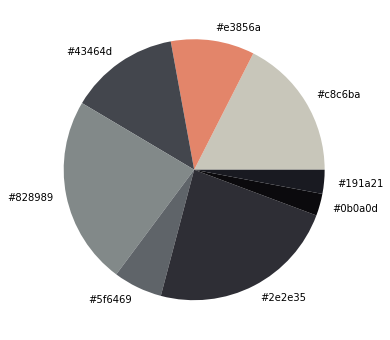

In [0]:
# count each label
counts = Counter(labels)

# get the most representative color in the cluster
centroid = km.cluster_centers_

# order colors by counts of labels
ordered_colors = [centroid[i] for i in counts.keys()]

# transform RGB color value into hex code
hex_code = [rgb2hex(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

plt.figure(figsize = (8, 6))
plt.pie(counts.values(), labels = hex_code, colors = hex_code)

# get vector of colorfulness 1

In [0]:
def image_colorfulness(image):
    
    # split the image into its respective RGB components
    (R, G, B) = cv2.split(image.astype("float"))
    
    # compute rg = R - G
    rg = np.absolute(R - G)
    
    # compute yb = 0.5 * (R + G) - B
    yb = np.absolute(0.5 * (R + G) - B)
    
    # compute the mean and standard deviation of both `rg` and `yb`
    (rbMean, rbStd) = (np.mean(rg), np.std(rg))
    (ybMean, ybStd) = (np.mean(yb), np.std(yb))
    
    # combine the mean and standard deviations
    stdRoot = np.sqrt((rbStd ** 2) + (ybStd ** 2))
    meanRoot = np.sqrt((rbMean ** 2) + (ybMean ** 2))
    
    # derive the "colorfulness" metric and return it
    return stdRoot + (0.3 * meanRoot)

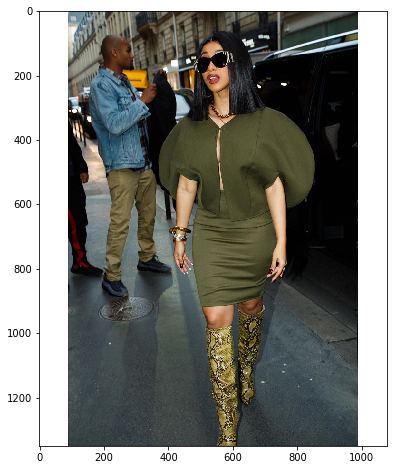

In [0]:
image2 = cv2.imread('71779024_2356084617976160_3229288779730870972_n.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(image2)

In [0]:
image_colorfulness(image2)

24.91217583291015

# get vector of colorfulness 2

In [0]:
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print(hsv_green)

[[[ 60 255 255]]]


In [0]:
def get_color_ratio_HSV(image):
    """
    To identify the relationship between ratio of different colors and # of likes,
    we use HSV color-space and examine, which is 360 degree.
    For HSV, hue range is [0,179], saturation range is [0,255], and value range is [0,255].
    Saturation represents how grey the color is, brightness represent 
    """
    RGB_im = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    RGB_im = RGB_im.astype(np.float32)
    RGB_im = cv2.resize(RGB_im, (270, 216), interpolation = cv2.INTER_AREA)
    RGB_im = RGB_im * 1/255
    HSV_im = cv2.cvtColor(RGB_im, cv2.COLOR_RGB2HSV)
    red = 0
    orange = 0
    yellow = 0
    green = 0
    cyan = 0
    blue = 0
    magenta = 0
    pink = 0
    # total # of pixels
    pixels = HSV_im.shape[0] * HSV_im.shape[1]
    
    for i in range(HSV_im.shape[0]):
        for j in range(HSV_im.shape[1]):
            if (HSV_im[i][j][0] >= 0.0 and HSV_im[i][j][0] < 20.0) or (HSV_im[i][j][0] >= 335.0 and 
                                                                       HSV_im[i][j][0] < 360.0):
                red += 1
            elif HSV_im[i][j][0] >= 20.0 and HSV_im[i][j][0] < 65.0:
                orange += 1
            elif HSV_im[i][j][0] >= 65.0 and HSV_im[i][j][0] < 110.0:
                yellow += 1
            elif HSV_im[i][j][0] >= 110.0 and HSV_im[i][j][0] < 155.0:
                green += 1
            elif HSV_im[i][j][0] >= 155.0 and HSV_im[i][j][0] < 200.0:
                cyan += 1
            elif  HSV_im[i][j][0] >= 200.0 and HSV_im[i][j][0] < 245.0:
                blue += 1
            elif  HSV_im[i][j][0] >= 245.0 and HSV_im[i][j][0] < 290.0:
                magenta += 1
            elif  HSV_im[i][j][0] >= 290.0 and HSV_im[i][j][0] < 335.0:
                pink += 1
    
    return[red/pixels, orange/pixels, green/pixels, cyan/pixels, blue/pixels, magenta/pixels, pink/pixels]

In [0]:
%time
get_color_ratio_HSV(image)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 37.9 µs


[0.5156207133058985,
 0.26160836762688616,
 0.015689300411522635,
 0.017198216735253773,
 0.09082647462277092,
 0.0387002743484225,
 0.04487311385459534]

## Try RGB color space

In [0]:
 """
This part is incomplete.
Tried to identify color using RGB color space
"""


lowerBlack = np.uint8([[[0, 0, 0]]])
upperBlack = np.uint8([[[192, 192, 192]]])

lowerBlue = np.uint8([[[0, 0, 255]]])
upperBlue = np.uint8([[[0, 0, 255]]])

rgbBrown = np.uint8([[[165, 42, 42]]])
lowerBrown = np.uint8([[[165, 42, 42]]])
upperBrown = hnp.uint8([[[165, 42, 42]]])

rgbCyan = np.uint8([[[0, 255, 255]]])
lowerCyan = np.uint8([[[0, 255, 255]]])
upperCyan = np.uint8([[[0, 255, 255]]])

rgbGold = np.uint8([[[255, 215, 0]]])
lowerGold = np.uint8([[[255, 215, 0]]])
upperGold = np.uint8([[[255, 215, 0]]])

rgbGreen = np.uint8([[[0, 255, 0]]])
lowerGreen = np.uint8([[[0, 255, 0]]])
upperGreen = hnp.uint8([[[0, 255, 0]]])

rgbWhite = np.uint8([[[255, 255, 255]]])
lowerWhite = hsvWhite[0][0][0] - 10, 100, 100
upperWhite = hsvWhite[0][0][0] + 10, 255, 255

rgbGrey = np.uint8([[[128, 128, 128]]])
hsvGrey = cv2.cvtColor(rgbGrey, cv2.COLOR_BGR2HSV)
lowerGrey = hsvGrey[0][0][0] - 10, 100, 100
upperGrey = hsvGrey[0][0][0] + 10, 255, 255

rgbMaroon = np.uint8([[[128, 0, 0]]])
hsvMaroon = cv2.cvtColor(rgbGrey, cv2.COLOR_BGR2HSV)
lowerMaroon = hsvMaroon[0][0][0] - 10, 100, 100
upperMaroon = hsvMaroon[0][0][0] + 10, 255, 255

rgbOrange = np.uint8([[[255, 165, 0]]])
hsvOrange = cv2.cvtColor(rgbOrange, cv2.COLOR_BGR2HSV)
lowerOrange = hsvOrange[0][0][0] - 10, 100, 100
upperOrange = hsvOrange[0][0][0] + 10, 255, 255

rgbPink = np.uint8([[[255, 192, 203]]])
hsvPink = cv2.cvtColor(rgbPink, cv2.COLOR_BGR2HSV)
lowerPink = hsvPink[0][0][0] - 10, 100, 100
upperPink = hsvPink[0][0][0] + 10, 255, 255

rgbRed = np.uint8([[[255, 0, 0]]])
hsvRed = cv2.cvtColor(rgbRed, cv2.COLOR_BGR2HSV)
lowerRed = hsvRed[0][0][0] - 10, 100, 100
upperRed = hsvRed[0][0][0] + 10, 255, 255

rgbYellow = np.uint8([[[255, 255, 0]]])
hsvYellow = cv2.cvtColor(rgbYellow, cv2.COLOR_BGR2HSV)
lowerYellow = hsvYellow[0][0][0] - 10, 100, 100
upperYellow = hsvYellow[0][0][0] + 10, 255, 255


In [0]:
upperYellow

(100, 255, 255)

In [0]:
%time
get_color_ratio_HSV(image)

CPU times: user 5 µs, sys: 16 µs, total: 21 µs
Wall time: 25 µs


[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [0]:
def get_color_avg_RGB(image):
    """
    RGB range 256
    """
    RGB_im = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    RGB_im = RGB_im.astype(np.float32)
    RGB_im = cv2.resize(RGB_im, (270, 216), interpolation = cv2.INTER_AREA)
    
    red = 0
    orange = 0
    yellow = 0
    green = 0
    cyan = 0
    blue =0
    magenta = 0
    pink = 0
    
    for i in range(RGB_im.shape[0]):
        for j in range(RGB_im.shape[1]):
            p = RGB_im[i][j]
            if (p[i][j][0] >= 0 and p[i][j][0] <= 192 and p[i][j][1] >= 0 
                and p[i][j][1] <= 192 and p[i][j][0] >= 0 and p[i][j][0] < 192 and:
                red += 1 
                
            elif HSV_im[i][j][0] >= 20 and HSV_im[i][j][0] < 65:
                orange += 1
                
            elif HSV_im[i][j][0] >= 65 and HSV_im[i][j][0] < 110:
                yellow += 1
                
            elif HSV_im[i][j][0] >= 110 and HSV_im[i][j][0] >= 155:
                green += 1
                
            elif HSV_im[i][j][0] >= 155 and HSV_im[i][j][0] >= 200:
                cyan += 1
                
            elif HSV_im[i][j][0] >= [110,50,50] and HSV_im[i][j][0] >= 245:
                blue += 1
                
            elif HSV_im[i][j][0] >= 245 and HSV_im[i][j][0] >= 290:
                magenta += 1
            elif HSV_im[i][j][0] >= 290 and HSV_im[i][j][0] >= 335:
                pink += 1
    
    return[red/pixels, orange/pixels, green/pixels, cyan/pixels, blue/pixels, magenta/pixels, pink/pixels]
    
    return [R_avg, G_avg, B_avg]

In [0]:
get_color_ratio_RGB(image2)

[105.0, 56.0, 47.0]

# Get all images from ig

In [0]:
def request_html(url):
    try:
        response = requests.get(url)
        html = response.text
        return html
    except:
        print('Opps! Occurred error')
        return None
    
def find_img_url(request_url):
    try:
        soup = BeautifulSoup(request_url)
        img_url = soup.find("meta", property="og:image")
        return img_url['content']
    except:
        print('Opps! Occurred error')
        return None

def downloader(img_url, n):
    try:
        img_name = str(n)
        request_url = requests.get(img_url)
        f = open('/images' + img_name + jpg, 'ab')
        f.write(requests_url.content)
        f.close()
    except:
        print('Opps! Occurred error')
        return None

def get_img(url, n):
    try:
        request_url = request_html(url)
        img_url = find_img_url(request_url)
        downloader(img_url, n)
    except:
        print('Opps! Occurred error')
        return None   
        

In [0]:
os.chdir('/Users/naitochieri/Desktop/brands/photos')

In [0]:
#Get all the links and all the related likes from json file
instagram_likes = []
for file in instagram_files:
    tmp = pd.read_json(file, lines=True)
    tmp = tmp[['link','social']]
    tmp['likes'] = tmp['likes'].map(lambda a: a['likes'])
    instagram_links.extend(tmp['link'].tolist())
    instagram_likes.extend(tmp['likes'].tolist())